You Can Access The Dataset From [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability?authuser=0&hl=en).

| Column        | Description                                               |
|---------------|-----------------------------------------------------------|
| pH            | The pH value measures how acidic or basic the water is.   |
| Hardness      | Measures the concentration of calcium and magnesium in water. |
| Solids        | Total dissolved solids in ppm.                            |
| Chloramines   | Amount of chloramines in ppm.                             |
| Sulfate       | Amount of sulfate in ppm.                                 |
| Conductivity  | Electrical conductivity of the water in μS/cm.            |
| Organic_carbon| Amount of organic carbon in ppm.                          |
| Trihalomethanes| Amount of trihalomethanes in ppm.                        |
| Turbidity     | Measure of the cloudiness of the water.                   |
| Potability    | Indicates if water is safe for human consumption (1: Potable, 0: Not Potable). |


In [23]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [24]:
df = pd.read_csv('water_potability.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [26]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [27]:
df.duplicated().sum()

0

In [28]:
df.isna().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

<Axes: >

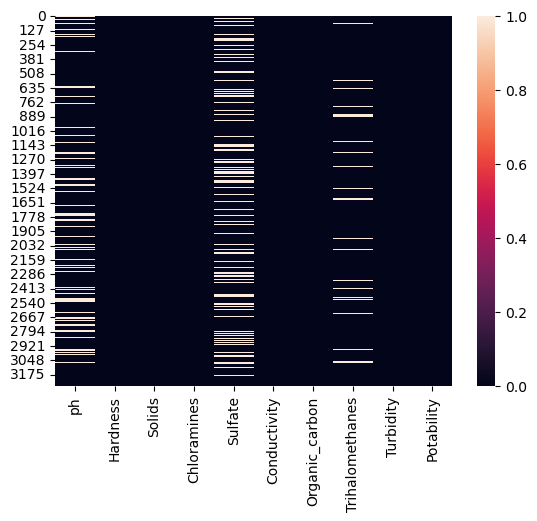

In [29]:
sns.heatmap(df.isna())

In [30]:
df.columns = df.columns.str.lower()

In [31]:
for i in df.columns:
    fig = px.histogram(df, x=i)
    fig.show()

In [32]:
for i in df.columns:
    fig = px.box(df, x=i)
    fig.show()

In [33]:
df['potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: potability, dtype: float64

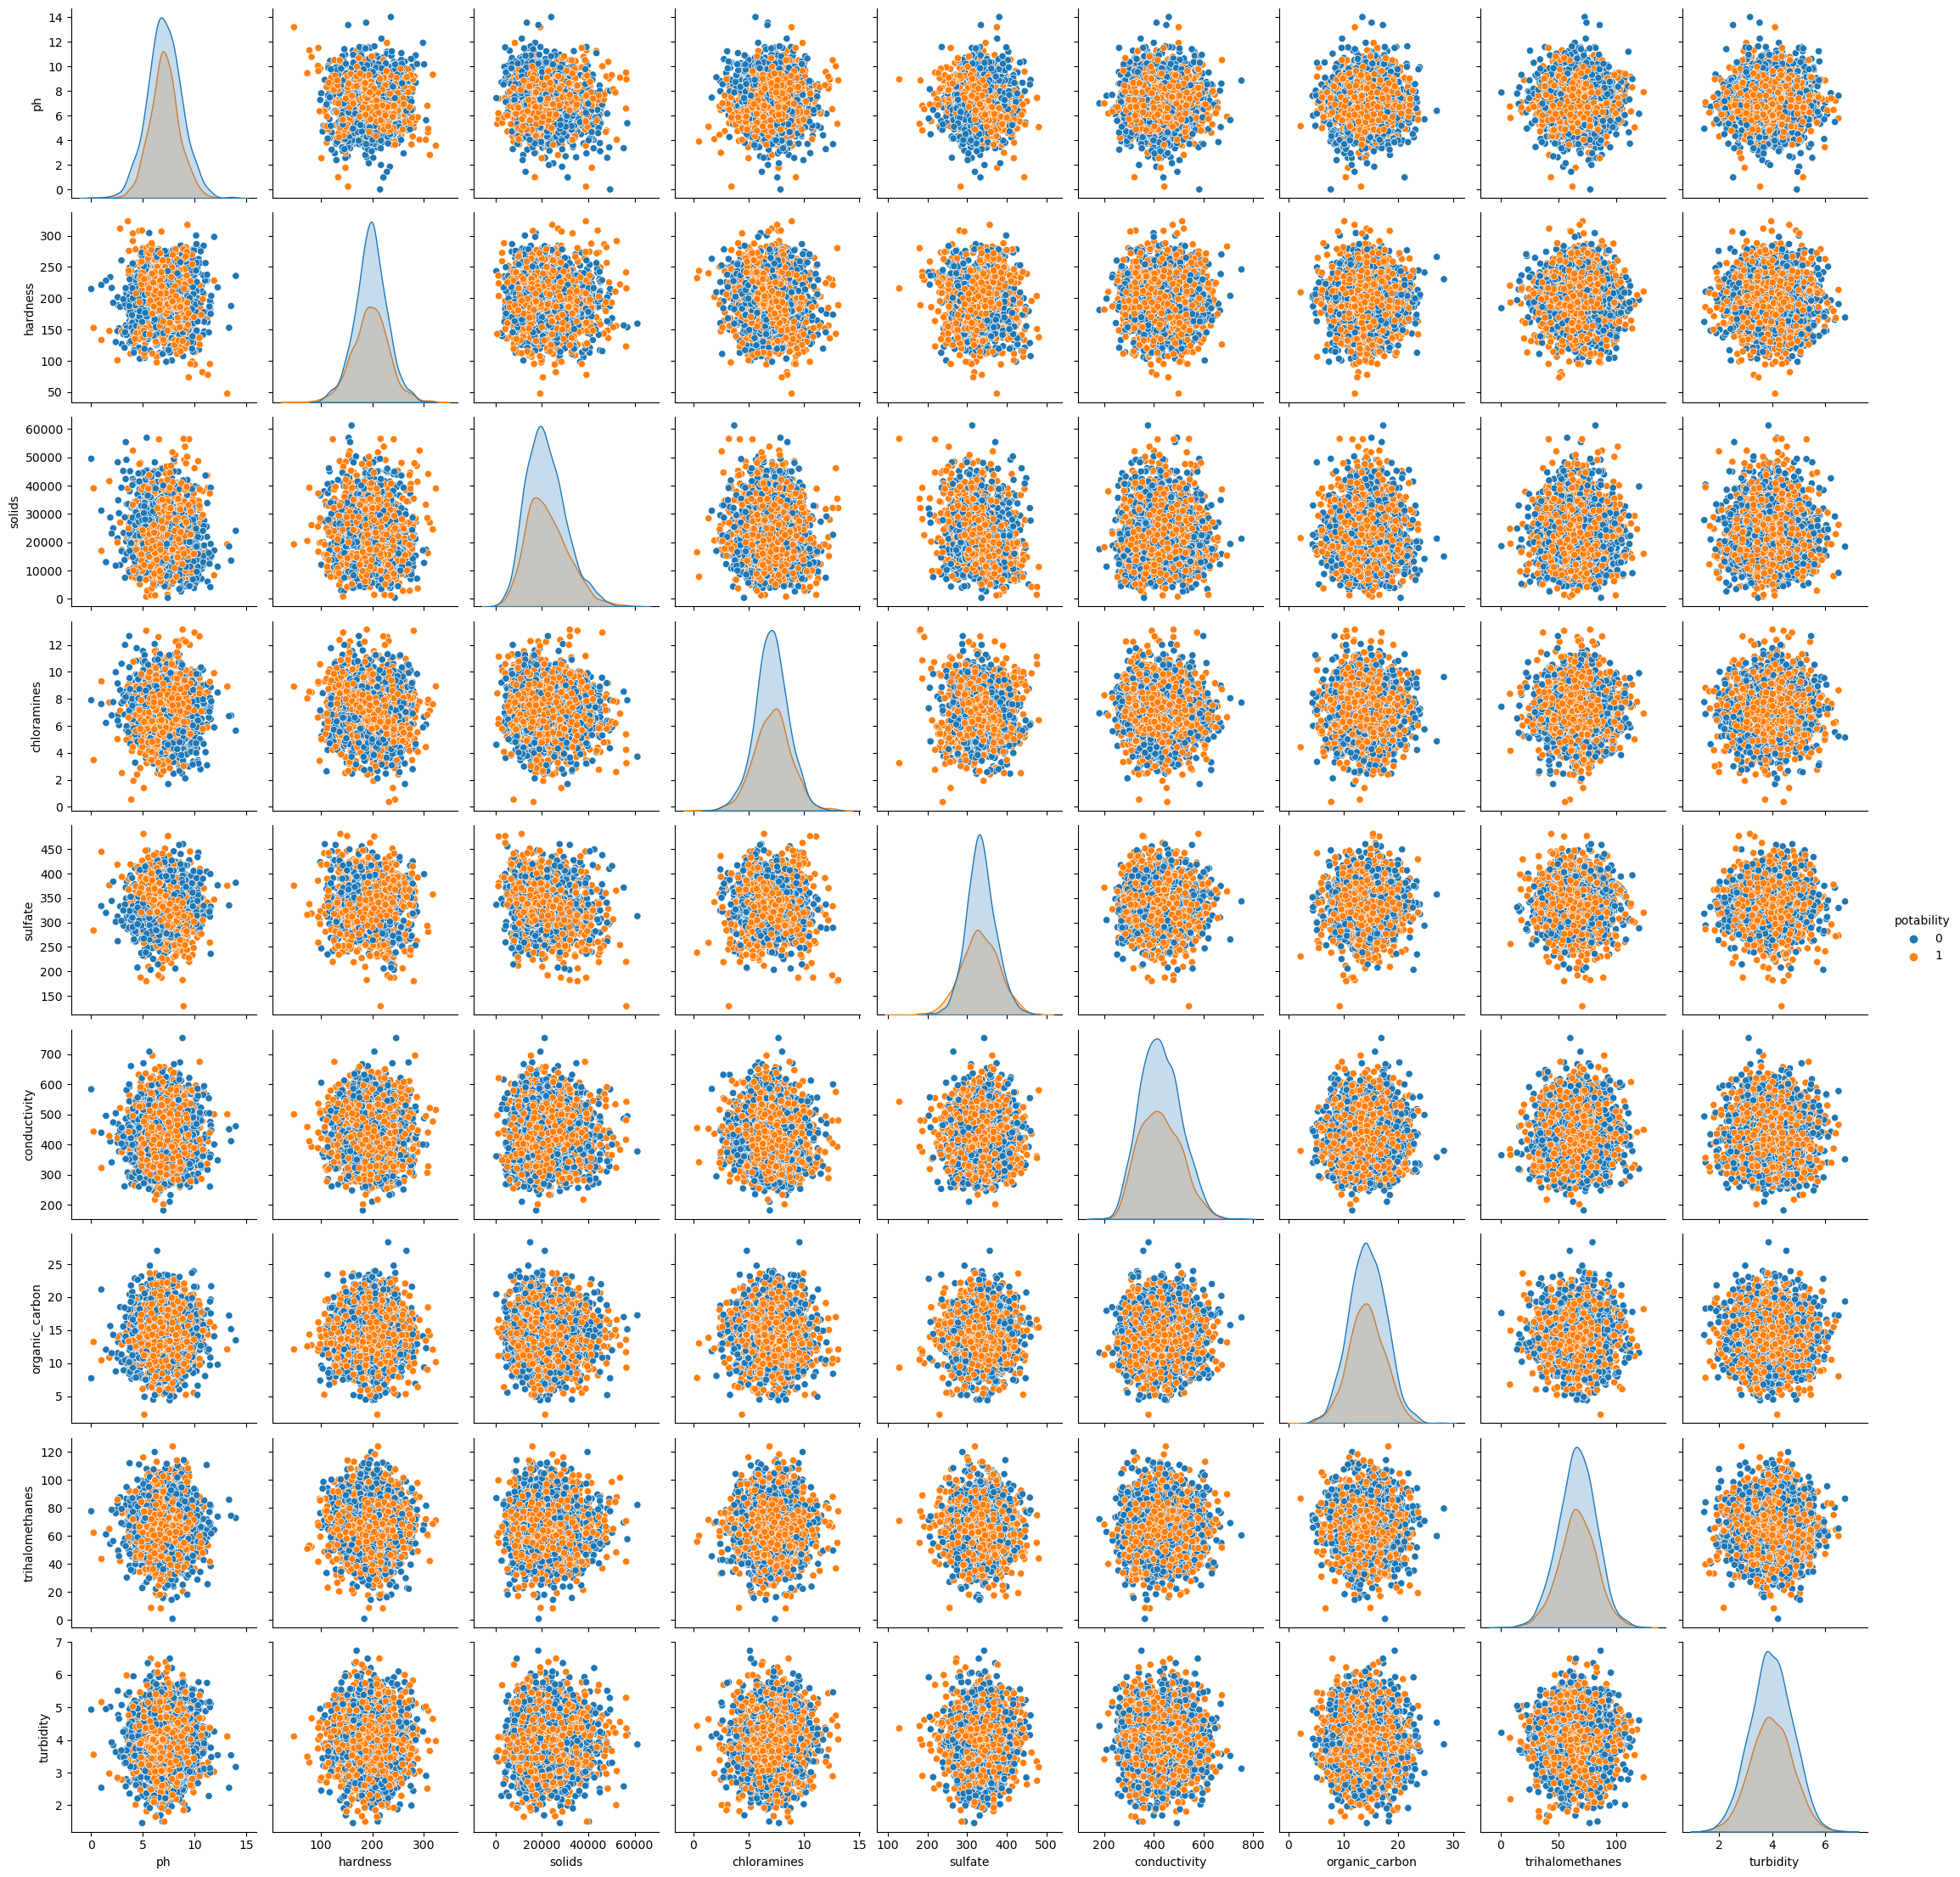

In [34]:
sns.pairplot(df, hue='potability')

In [35]:
df.corr().style.background_gradient(cmap='coolwarm')

In [36]:
df.corr()['potability'].sort_values(ascending=False)

potability         1.000000
solids             0.033743
chloramines        0.023779
trihalomethanes    0.007130
turbidity          0.001581
ph                -0.003556
conductivity      -0.008128
hardness          -0.013837
sulfate           -0.023577
organic_carbon    -0.030001
Name: potability, dtype: float64

<Axes: >

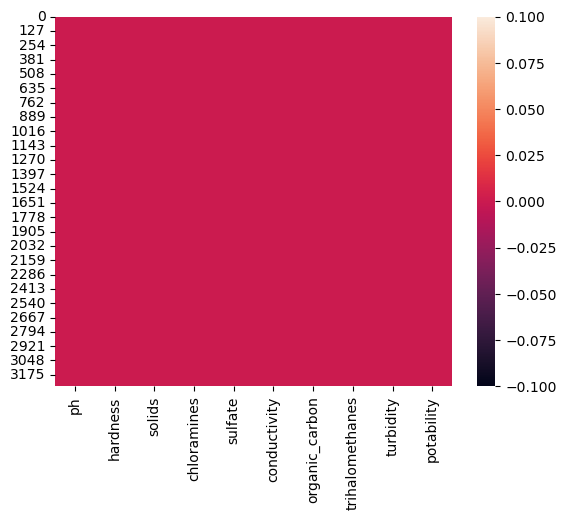

In [37]:
df['ph'] = df['ph'].fillna(df['ph'].median())
df['sulfate'] = df['sulfate'].fillna(df['sulfate'].median())
df['trihalomethanes'] = df['trihalomethanes'].fillna(df['trihalomethanes'].median())
sns.heatmap(df.isna())

In [38]:
X = df.drop('potability', axis=1)
y = df['potability']

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.metrics import classification_report

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

y_pred_train = dt.predict(X_train)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 57.77439024390244
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.66      0.66       400
           1       0.46      0.45      0.46       256

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656



In [42]:
dt.feature_importances_

array([0.13713311, 0.13695374, 0.12386235, 0.13540866, 0.13084639,
       0.06077826, 0.0763993 , 0.0963403 , 0.10227789])

In [43]:
# feature importance with columns
pd.DataFrame(data=dt.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

importance
ph                 0.137133
hardness           0.136954
chloramines        0.135409
sulfate            0.130846
solids             0.123862
turbidity          0.102278
trihalomethanes    0.096340
organic_carbon     0.076399
conductivity       0.060778

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('-'*55)
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.65      0.66      0.66       400
           1       0.46      0.45      0.46       256

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.58      0.58      0.58       656

-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1598
           1       1.00      1.00      1.00      1022

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620



# logistic regression With Polynomial Features

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

pipe_lr_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', RobustScaler()),
    ('lr', LogisticRegression())
])

pipe_lr_poly.fit(X_train, y_train)

y_pred = pipe_lr_poly.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 65.70121951219512
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.88      0.76       400
           1       0.62      0.30      0.41       256

    accuracy                           0.66       656
   macro avg       0.64      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



# SVC

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.svm import SVC

pipe_svc = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', SVC()),
])

pipe_svc.fit(X_train, y_train)

y_pred = pipe_svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 66.92073170731707
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.92      0.77       400
           1       0.68      0.29      0.40       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.59       656
weighted avg       0.67      0.67      0.63       656



In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.svm import SVC

pipe_svc = Pipeline([
    ('scaler', RobustScaler()),
    ('svc', SVC(kernel='poly')),
])

pipe_svc.fit(X_train, y_train)

y_pred = pipe_svc.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 62.65243902439024
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.97      0.76       400
           1       0.68      0.08      0.15       256

    accuracy                           0.63       656
   macro avg       0.65      0.53      0.45       656
weighted avg       0.64      0.63      0.52       656



In [48]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'svc__C': [0.1, 1, 10, 100, 1000],
#     'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#     'svc__kernel': ['rbf', 'poly']
# }

# grid = GridSearchCV(pipe_svc, param_grid, cv=5)

# grid.fit(X_train, y_train)
# grid.best_score_, grid.best_params_

# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

pipe_nb = Pipeline([
    ('scaler', RobustScaler()),
    ('nb', GaussianNB())
])

pipe_nb.fit(X_train, y_train)

y_pred = pipe_nb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 61.4329268292683
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74       400
           1       0.52      0.19      0.28       256

    accuracy                           0.61       656
   macro avg       0.57      0.54      0.51       656
weighted avg       0.59      0.61      0.56       656



# RandomForestClassifier

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier

pipe_rf = Pipeline([
    ('scaler', RobustScaler()),
    ('rf', RandomForestClassifier(max_depth=12,min_samples_split=40,min_samples_leaf=5,random_state=42,n_estimators=500))
])

pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 66.76829268292683
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.95      0.78       400
           1       0.74      0.23      0.35       256

    accuracy                           0.67       656
   macro avg       0.70      0.59      0.56       656
weighted avg       0.69      0.67      0.61       656



# GradientBoostingClassifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline([
    ('scaler', RobustScaler()),
    ('gb', GradientBoostingClassifier())
])

pipe_gb.fit(X_train, y_train)

y_pred = pipe_gb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 65.2439024390244
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.91      0.76       400
           1       0.64      0.25      0.36       256

    accuracy                           0.65       656
   macro avg       0.65      0.58      0.56       656
weighted avg       0.65      0.65      0.60       656



# AdaBoostClassifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

pipe_ab = Pipeline([
    ('scaler', RobustScaler()),
    ('ab', AdaBoostClassifier())
])

pipe_ab.fit(X_train, y_train)

y_pred = pipe_ab.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred)*100)
print('-'*55)
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 61.58536585365854
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.87      0.73       400
           1       0.52      0.22      0.31       256

    accuracy                           0.62       656
   macro avg       0.58      0.54      0.52       656
weighted avg       0.59      0.62      0.57       656



## The best model is Random Forest Classifier

### With max_depth=12,min_samples_split=40,min_samples_leaf=5,random_state=42